# Example of the aitlas toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the aitlas toolbox.

## Import the required packages

In [12]:
from aitlas.datasets import GID15Dataset
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor
from aitlas.models import DeepLabV3

## Visualize images and masks

Total number of patches: 100


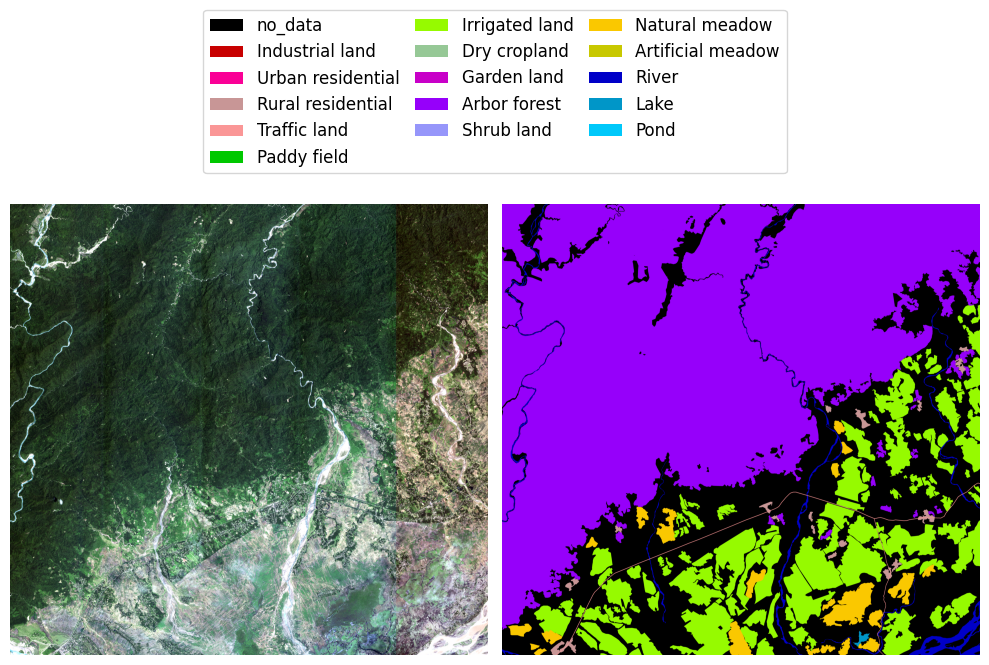

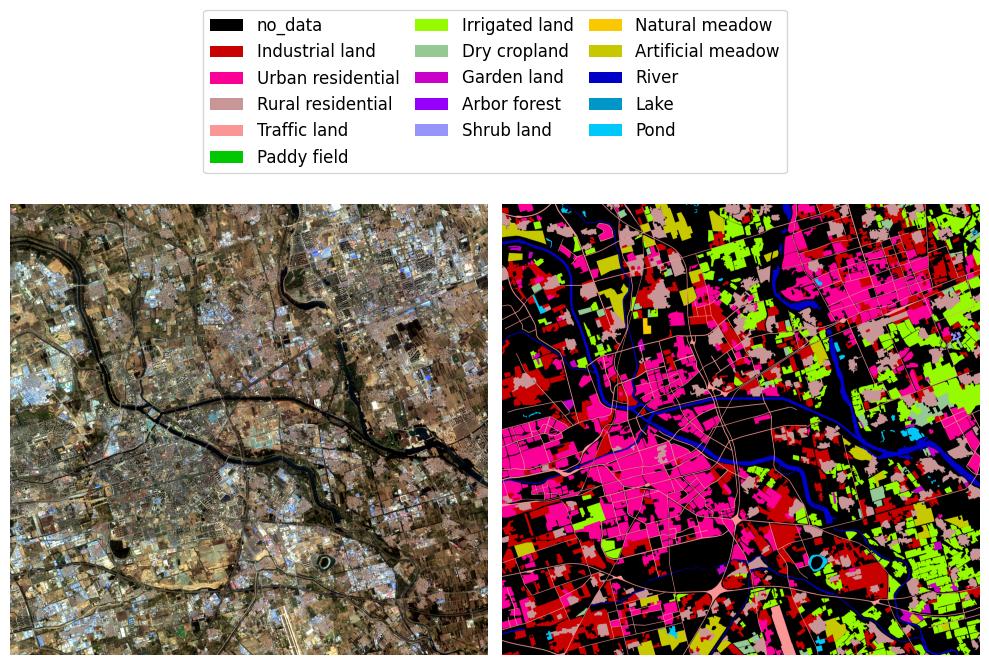

In [2]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/GID-15/GID/./train"
}
dataset = GID15Dataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1);
dataset.show_image(26);

In [3]:
dataset.data_distribution_table()

,Number of pixels
no_data,1.824889e+09
Industrial land,9.705414e+07
Urban residential,1.930293e+08
Rural residential,1.520666e+08
Traffic land,7.965853e+07
Paddy field,9.314880e+07
Irrigated land,1.203182e+09
Dry cropland,3.602505e+08
Garden land,3.162408e+07
Arbor forest,2.607901e+08


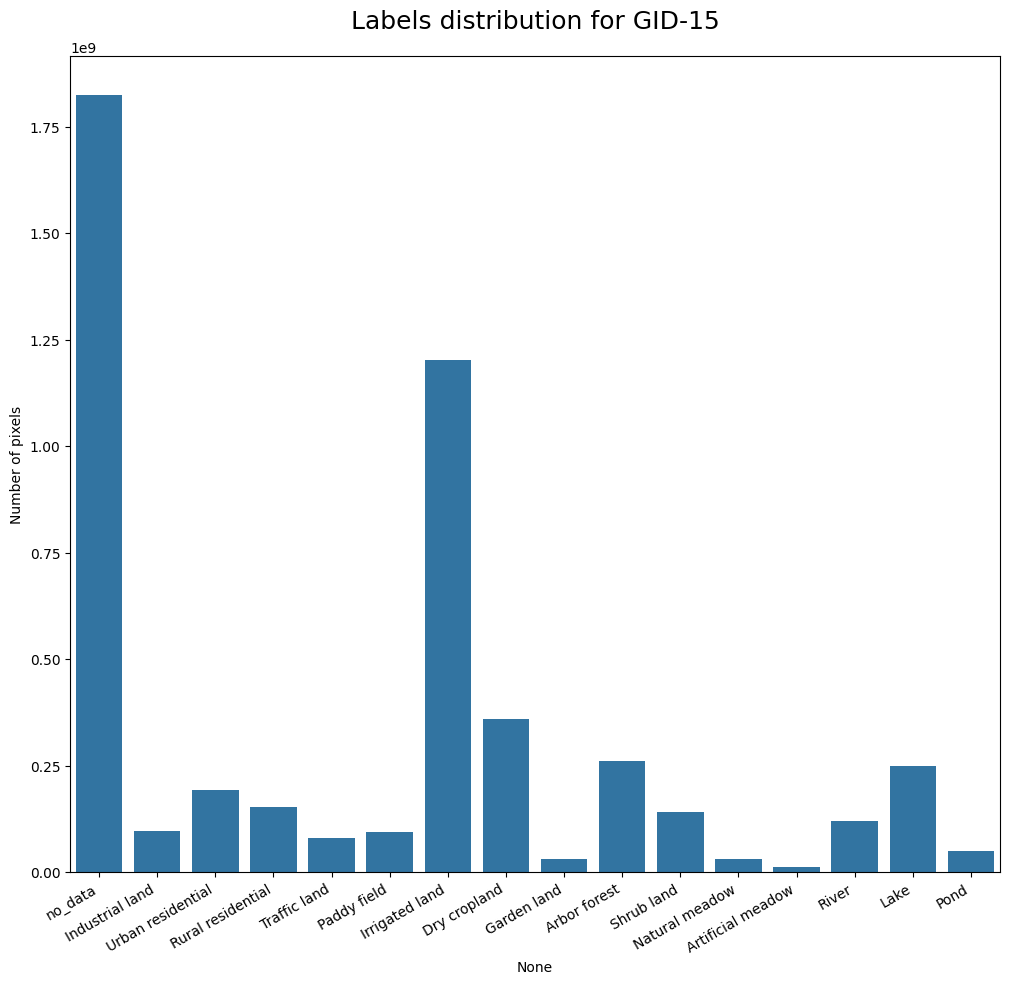

In [4]:
dataset.data_distribution_barchart();

## Load training data ##

In [3]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/GID-15/GID/./train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = GID15Dataset(train_dataset_config)
len(train_dataset)

100

## Create the model ##

In [ ]:
epochs = 5
model_directory = "/home/dragik/data/semseg/GID-15/experiments"
model_config = {
    "num_classes": 16, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training ##

In [6]:
model.train_model( 
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [03:15<00:00,  7.83s/it]

epoch: 1, time: 196, loss:  0.88221



testing on train set: 100%|█████████████████████████████████████████████████████████████| 25/25 [03:22<00:00,  8.10s/it]

IOU:0.05668273825338298, IOU mean:0.0522826946853832, IOU per Class:[2.41034847e-01 9.32731411e-06 1.73196287e-02 6.12893724e-03
 1.30484294e-04 7.41776730e-02 2.13230821e-01 4.43882516e-02
 1.08939717e-03 4.48322941e-02 5.65519161e-02 3.26768322e-03
 0.00000000e+00 1.37277172e-02 1.12976272e-01 7.65786611e-03]



training: 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [03:16<00:00,  7.85s/it]

epoch: 2, time: 197, loss:  0.86042



testing on train set: 100%|█████████████████████████████████████████████████████████████| 25/25 [03:21<00:00,  8.04s/it]

IOU:0.11485072846606631, IOU mean:0.07112199972958527, IOU per Class:[0.24540792 0.         0.04007701 0.00912272 0.         0.08437185
 0.241603   0.06932976 0.00227306 0.07331524 0.18925371 0.00425378
 0.         0.03426082 0.11316594 0.03151719]



training: 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [03:26<00:00,  8.26s/it]

epoch: 3, time: 206, loss:  0.84220



testing on train set: 100%|█████████████████████████████████████████████████████████████| 25/25 [03:29<00:00,  8.37s/it]

IOU:0.16127796632532637, IOU mean:0.09686547106148066, IOU per Class:[0.25819658 0.         0.04047535 0.01458697 0.         0.
 0.24692749 0.06404094 0.         0.09861354 0.47414177 0.02267458
 0.         0.10488822 0.22530208 0.        ]



training: 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [03:11<00:00,  7.67s/it]

epoch: 4, time: 192, loss:  0.82344



testing on train set: 100%|█████████████████████████████████████████████████████████████| 25/25 [03:25<00:00,  8.22s/it]


IOU:0.17991363170251226, IOU mean:0.06916347904942736, IOU per Class:[0.2387976  0.         0.06878609 0.         0.         0.
 0.25165542 0.11401816 0.         0.08739519 0.02951938 0.00444651
 0.         0.09416328 0.21783403 0.        ]


training: 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [03:28<00:00,  8.36s/it]

epoch: 5, time: 209, loss:  0.80802



testing on train set: 100%|█████████████████████████████████████████████████████████████| 25/25 [03:30<00:00,  8.43s/it]

IOU:0.1926096096096096, IOU mean:0.09567521578840027, IOU per Class:[0.26778476 0.         0.05541398 0.         0.         0.
 0.21534301 0.14308657 0.         0.11462425 0.43837986 0.
 0.         0.09516776 0.20100326 0.        ]


Train loss: [0.8730413413047791, 0.8371235299110412, 0.8194728827476502, 0.8054549503326416, 0.7931178164482117]
Validation loss: []
Train time per epochs: [196, 197, 206, 192, 209]
Finished training. training time: 1000


## Evaluate the model ##

In [8]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/GID-15/GID/./val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}

test_dataset = GID15Dataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/GID-15/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

Loading checkpoint /home/dragik/data/semseg/GID-15/experiments/checkpoint.pth.tar
Loaded checkpoint /home/dragik/data/semseg/GID-15/experiments/checkpoint.pth.tar at epoch 6


testing on test set: 100%|████████████████████████████████████████████████████████████████| 3/3 [00:29<00:00,  9.69s/it]


[{'IOU': 0.1542007790669355,
  'IOU mean': 0.06702366631739576,
  'IOU per Class': array([0.19536288, 0.        , 0.07101409, 0.        , 0.        ,
         0.        , 0.16158089, 0.00326284, 0.        , 0.25388494,
         0.        , 0.        , 0.        , 0.30345254, 0.08382049,
         0.        ])}]

## Predictions ##

Loading checkpoint /home/dragik/data/semseg/GID-15/experiments/checkpoint.pth.tar
Loaded checkpoint /home/dragik/data/semseg/GID-15/experiments/checkpoint.pth.tar at epoch 6


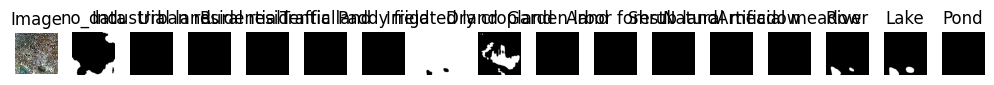

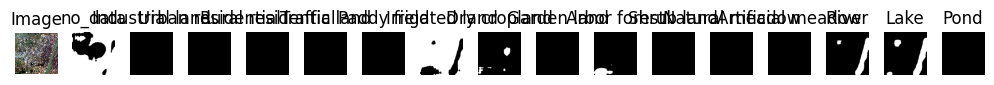

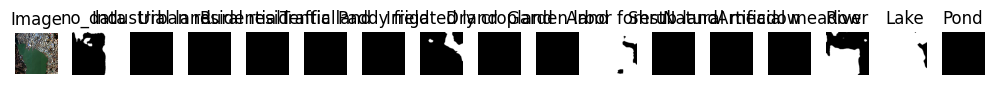

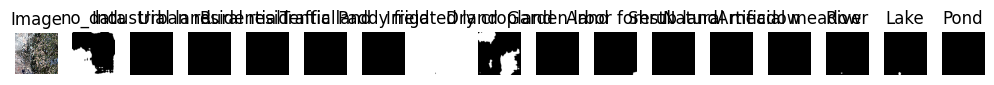

In [18]:
model_path = "/home/dragik/data/semseg/GID-15/experiments/checkpoint.pth.tar"
labels = ["no_data","Industrial land","Urban residential","Rural residential","Traffic land","Paddy field","Irrigated land","Dry cropland","Garden land","Arbor forest","Shrub land","Natural meadow","Artificial meadow","River","Lake","Pond"]
transform = ResizeToTensor()
model.load_model(model_path)

image = image_loader('/home/dragik/data/semseg/GID-15/GID/img_dir/test/GF2_PMS1__L1A0001348919-MSS1.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/GID-15/GID/img_dir/test/GF2_PMS2__L1A0000647892-MSS2.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/GID-15/GID/img_dir/test/GF2_PMS2__L1A0001378491-MSS2.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/GID-15/GID/img_dir/test/GF2_PMS2__L1A0001824765-MSS2.tif')
fig = model.predict_masks(image, labels, transform)
